In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
#compute predicted length distribution and gt length distribution
predlen_dist = {}
gtlen_dist = {}
with open('../eval.qb_4grm', 'r') as f:
    for query in f:
        query = query.strip()
        query = query.split('\t')
        if(query[-1]=='-'):
            continue
        y = query[1]
        pred = query[2]
        predlen_dist[len(pred)] = predlen_dist.get(len(pred), 0) + 1
        gtlen_dist[len(y)] = gtlen_dist.get(len(y), 0) + 1

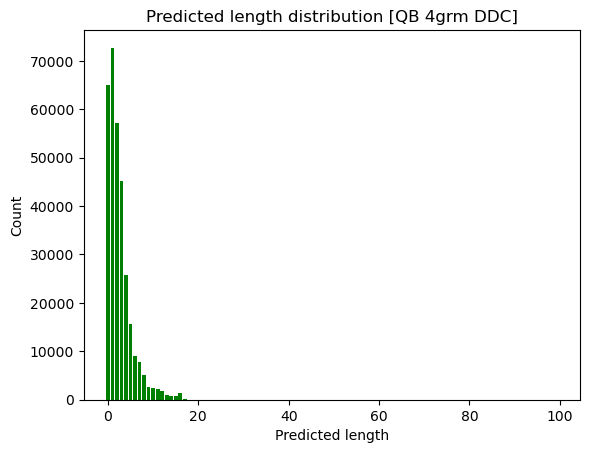

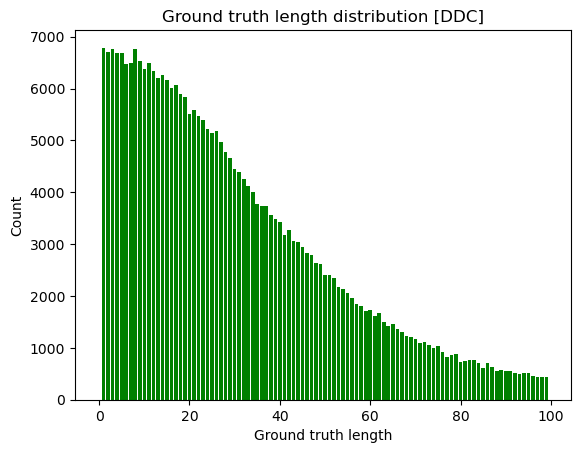

In [58]:
# plt both distributions
x = np.arange(0, 100)
y = []
for i in x:
    y.append(predlen_dist.get(i, 0))
plt.bar(x, y, color='green')
plt.title("Predicted length distribution [QB 4grm DDC]")
plt.xlabel("Predicted length")
plt.ylabel("Count")
plt.show()
y = []
for i in x:
    y.append(gtlen_dist.get(i, 0))
plt.bar(x, y, color='green')
plt.title("Ground truth length distribution [DDC]")
plt.xlabel("Ground truth length")
plt.ylabel("Count")
plt.show()

In [59]:
df = pd.read_csv('../resultsQB_4grm.csv', delimiter = ";")
df = pd.DataFrame(df.values[10:], columns = df.columns)

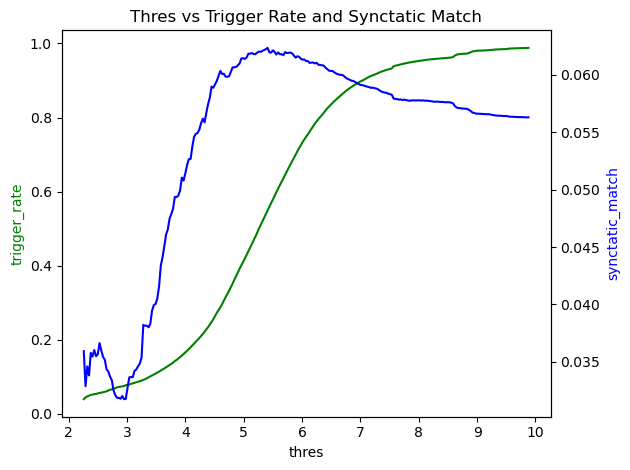

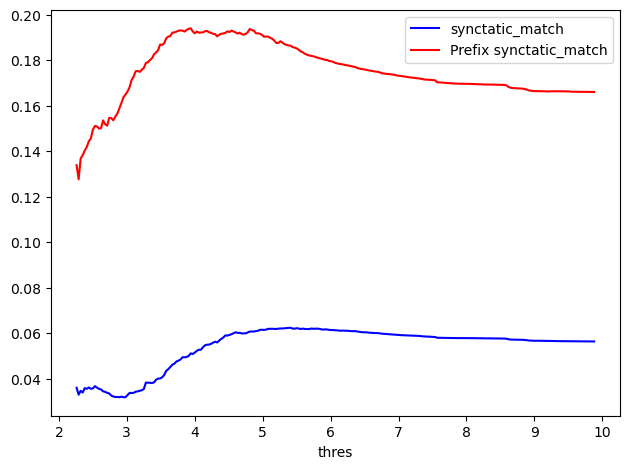

In [60]:
# plot thres vs triger rate and synctatic match using axis twin

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['thres'], df['trigger_rate'], 'g-')
ax2.plot(df['thres'], df['synctatic_match'], 'b-')
ax1.set_xlabel('thres')
ax1.set_ylabel('trigger_rate', color='g')
ax2.set_ylabel('synctatic_match', color='b')
ax1.set_title('Thres vs Trigger Rate and Synctatic Match')
plt.tight_layout()
plt.show()

# plot thres vs synctatic match and Psynctatic match using label

fig, ax1 = plt.subplots()
ax1.plot(df['thres'], df['synctatic_match'], 'b-', label='synctatic_match')
ax1.plot(df['thres'], df['Psynctatic_match'], 'r-', label='Prefix synctatic_match')

ax1.set_xlabel('thres')
ax1.legend()

plt.tight_layout()
plt.show()


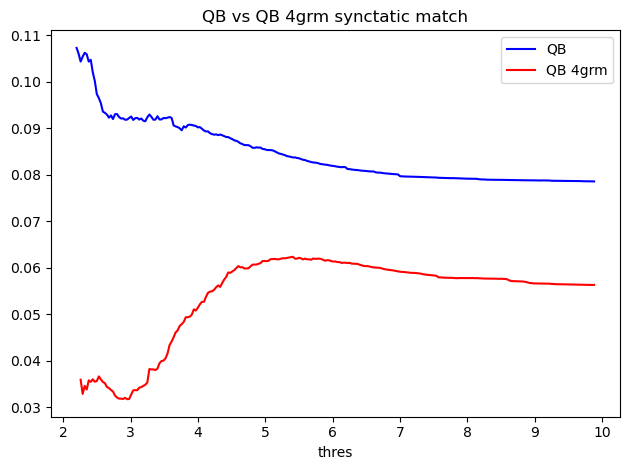

In [113]:
# plot qb vs qb4grm
dfQB = pd.read_csv('../resultsQB.csv', delimiter = ";")
dfQB = pd.DataFrame(dfQB.values[40:], columns = dfQB.columns)
dfQB4grm = pd.read_csv('../resultsQB_4grm.csv', delimiter = ";")
dfQB4grm = pd.DataFrame(dfQB4grm.values[10:], columns = dfQB4grm.columns)

fig, ax1 = plt.subplots()
ax1.plot(dfQB['thres'], dfQB['synctatic_match'], 'b-', label='QB')
ax1.plot(dfQB4grm['thres'], dfQB4grm['synctatic_match'], 'r-', label='QB 4grm')

ax1.set_xlabel('thres')
ax1.legend()
ax1.set_title('QB vs QB 4grm synctatic match')

plt.tight_layout()
plt.show()

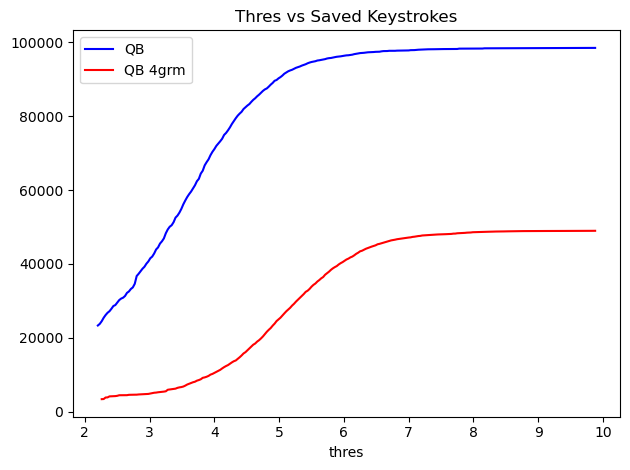

In [62]:
# df vs df4grm saved_keystrokes
df = pd.read_csv('../resultsQB.csv', delimiter = ";")
df = pd.DataFrame(df.values[40:], columns = df.columns)
df4grm = pd.read_csv('../resultsQB_4grm.csv', delimiter = ";")
df4grm = pd.DataFrame(df4grm.values[10:], columns = df4grm.columns)

fig, ax1 = plt.subplots()
ax1.plot(df['thres'], df['saved_keystrokes'], 'b-', label='QB')
ax1.plot(df4grm['thres'], df4grm['saved_keystrokes'], 'r-', label='QB 4grm')

ax1.set_xlabel('thres')
ax1.legend()
ax1.set_title('Thres vs Saved Keystrokes')

plt.tight_layout()
plt.show()

In [111]:
cols = ['thres', 'trigger_rate', 'synctatic_match', 'matched_length', 'saved_keystrokes']
dfQB4grm = pd.read_csv('../resultsQB_4grm.csv', delimiter = ";")[cols]
dfQB4grm_data = ["QB_4grm"] + list(dfQB4grm.iloc[121])
dfQB = pd.read_csv('../resultsQB.csv', delimiter = ";")[cols]
dfQB_data = ["QB"] + list(dfQB.iloc[107])
print(dfQB4grm_data)
cols = ['model', 'thres', 'trigger_rate', 'synctatic_match', 'matched_length', 'saved_keystrokes']
pd.DataFrame([dfQB4grm_data] + [dfQB_data], columns=cols).to_csv('../resultsQB4grm_vs_QB.csv', index=False, sep=';')

['QB_4grm', 5.59, 0.60817, 0.06197, 2.95466, 35252.0]


In [112]:
pd.read_csv('../resultsQB4grm_vs_QB.csv', delimiter = ";")

,model,thres,trigger_rate,synctatic_match,matched_length,saved_keystrokes
0,QB_4grm,5.59,0.60817,0.06197,2.95466,35252.0
1,QB,4.21,0.60660,0.08874,4.46902,76161.0
